In [ ]:
import pandas as pd
import requests
from tqdm import tqdm
import seaborn as sns

sns.set_theme(context="paper", style="whitegrid", palette="deep")

def get_govsg_df(dataset_id: str) -> pd.DataFrame:
    url = "https://data.gov.sg/api/action/datastore_search?resource_id=" + dataset_id
    response = requests.get(url).json()
    records = response["result"]["records"]
    pbar = tqdm(total=response["result"]["total"], desc=response["result"]["resource_id"])
    pbar.update(len(response["result"]["records"]))
    while response["result"]["records"]:  # returns empty list after last row
        url = "https://data.gov.sg" + response["result"]["_links"]["next"]
        response = requests.get(url).json()
        records += response["result"]["records"]
        pbar.update(len(response["result"]["records"]))
    pbar.close()
    return pd.DataFrame(records)


df = get_govsg_df("d_8b84c4ee58e3cfc0ece0d773c8ca6abc")
df.head()

d_8b84c4ee58e3cfc0ece0d773c8ca6abc: 100%|██████████| 194430/194430 [12:34<00:00, 257.82it/s]


,_id,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,1,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44,Improved,1979,61 years 04 months,232000
1,2,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67,New Generation,1978,60 years 07 months,250000
2,3,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,262000
3,4,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68,New Generation,1980,62 years 01 month,265000
4,5,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,265000


In [11]:
df["month"] = pd.to_datetime(df["month"])
df["resale_price"] = df["resale_price"].astype(float)
df["floor_area_sqm"] = df["floor_area_sqm"].astype(float)

<Axes: xlabel='floor_area_sqm', ylabel='resale_price'>

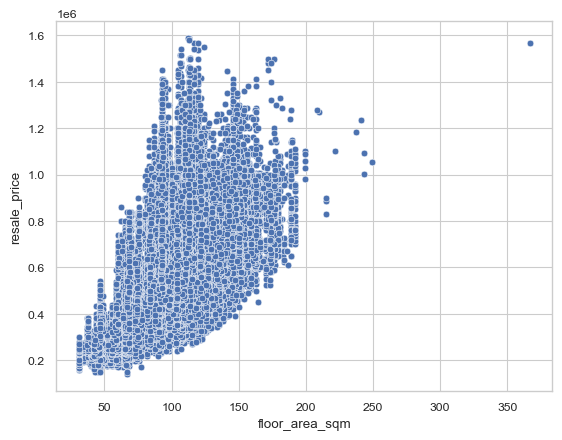

In [ ]:
sns.scatterplot(df, x="floor_area_sqm", y="resale_price")

<Axes: xlabel='resale_price', ylabel='town'>

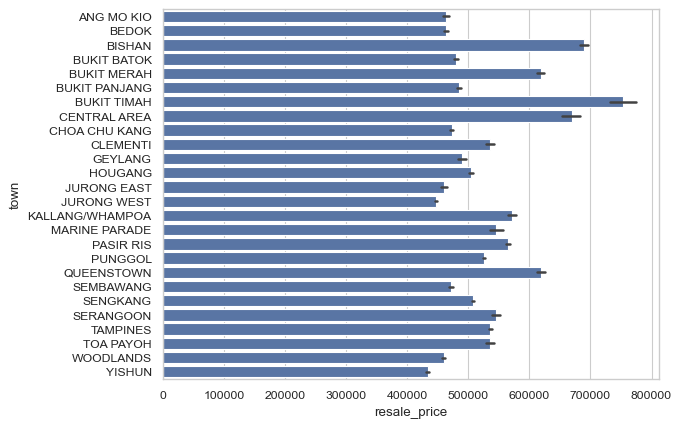

In [18]:
sns.barplot(df, x="resale_price", y="town")

Text(0.5, 1.0, 'Ang Mo Kio resale price vs time')

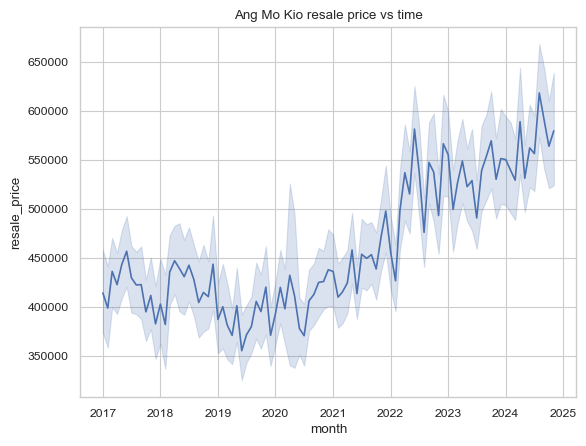

In [20]:
ax = sns.lineplot(df[df["town"]=="ANG MO KIO"], x="month", y="resale_price")
ax.set_title("Ang Mo Kio resale price vs time")